# Homework 2

January 14, 2021

### 1.) Using the data from a perceptual learning experiment (percep_learn.csv), carry our four analyses: (please treat the variable ‘trial’ as a factor for now.)

a.	A traditional repeated measures analysis with no corrections.<br>
b.	The above analysis with corrections.<br>
c.	The MANOVA approach.

In [2]:
library(car)
library(ez)
library(tidyr)

Loading required package: carData
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 methods overwritten by 'lme4':
  method                          from
  cooks.distance.influence.merMod car 
  influence.merMod                car 
  dfbeta.influence.merMod         car 
  dfbetas.influence.merMod        car 


In [3]:
learn = read.csv('data_files/percep_learn.csv')
learn$trial = as.factor(learn$trial)
learn$group = as.factor(learn$group)
learn$subj = as.factor(learn$subj)
head(learn)

subj,trial,group,per_corr
1,1,1,48.03634
1,2,1,57.01418
1,3,1,60.78102
1,4,1,71.94232
1,5,1,77.94697
2,1,1,43.86001


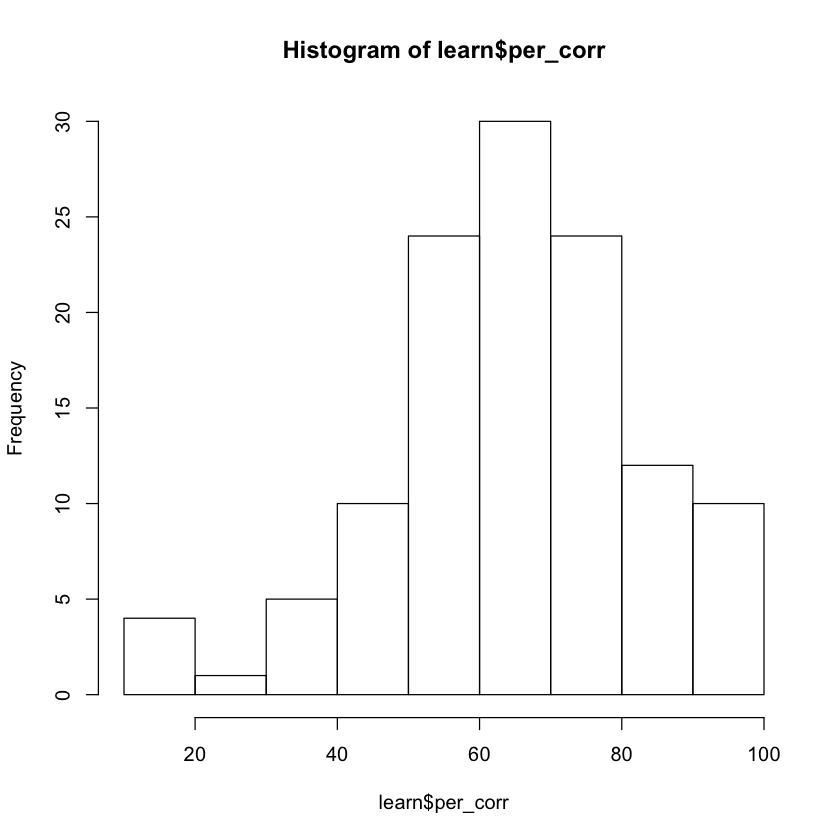

In [9]:
hist(learn$per_corr)

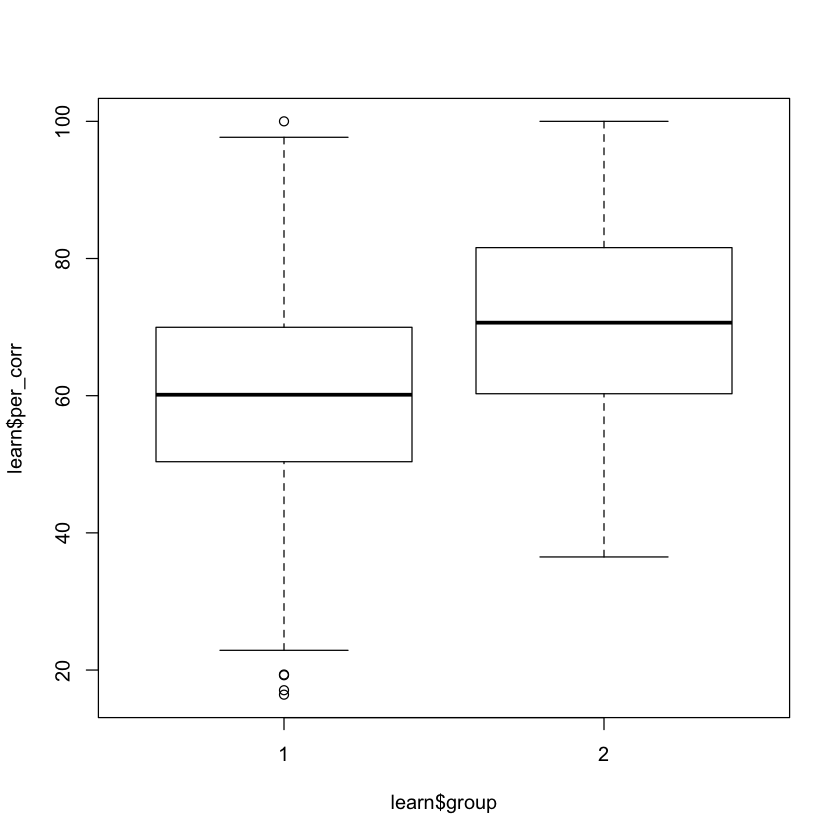

In [10]:
boxplot(learn$per_corr ~ learn$group)

In [12]:
aggregate(per_corr ~ group, data=learn, mean)
aggregate(per_corr ~ group, data=learn, var)

group,per_corr
1,58.95512
2,70.17700


group,per_corr
1,324.7597
2,281.6308


In [49]:
# perform anova with no corrections
learn_aov = aov(per_corr ~ group * trial + Error(subj), data = learn)   # uses Type II SS, can't change
summary(learn_aov)


Error: subj
          Df Sum Sq Mean Sq F value Pr(>F)  
group      1   3778    3778   4.541 0.0445 *
Residuals 22  18303     832                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: Within
            Df Sum Sq Mean Sq F value   Pr(>F)    
trial        4  15472    3868 210.925  < 2e-16 ***
group:trial  4    388      97   5.289 0.000728 ***
Residuals   88   1614      18                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [87]:
# create contrasts of interest
low2high = c(-1,-0.5,0, 0.5, 1)
lowvhigh = c(-1, -1, 0, 1, 1)
contrasts(learn$trial) <- cbind(low2high, lowvhigh)
contrasts(learn$group) <- contr.sum(2)

In [88]:
# perform anova using GG and HF corrections
learn.ez <- ezANOVA(data = learn, dv = .(per_corr), wid = .(subj),
                  between = .(group), within = .(trial), type = 3, detailed = T, return_aov = TRUE)
print(learn.ez)

$ANOVA
       Effect DFn DFd         SSn       SSd          F            p p<.05
1 (Intercept)   1  22 500253.1756 18303.414 601.285098 1.811481e-17     *
2       group   1  22   3777.9154 18303.414   4.540909 4.451505e-02     *
3       trial   4  88  15471.9328  1613.764 210.924554 3.313262e-44     *
4 group:trial   4  88    387.9301  1613.764   5.288543 7.284997e-04     *
         ges
1 0.96171028
2 0.15943872
3 0.43719473
4 0.01910505

$`Mauchly's Test for Sphericity`
       Effect         W          p p<.05
3       trial 0.2802198 0.00213143     *
4 group:trial 0.2802198 0.00213143     *

$`Sphericity Corrections`
       Effect      GGe        p[GG] p[GG]<.05       HFe        p[HF] p[HF]<.05
3       trial 0.575519 1.935612e-26         * 0.6466131 2.028532e-29         *
4 group:trial 0.575519 5.972171e-03         * 0.6466131 4.180082e-03         *

$aov

Call:
aov(formula = formula(aov_formula), data = data)

Grand Mean: 64.56606

Stratum 1: subj

Terms:
                    group Re

In [4]:
## Now Using MANOVA
# convert to wide data
learn_wide <- spread(learn, trial, per_corr)
# # Rename 1 to first, and 2 to second
names(learn_wide)[names(learn_wide)=="1"] <- "first"
names(learn_wide)[names(learn_wide)=="2"] <- "second"
names(learn_wide)[names(learn_wide)=="3"] <- "third"
names(learn_wide)[names(learn_wide)=="4"] <- "fourth"
names(learn_wide)[names(learn_wide)=="5"] <- "fifth"
head(learn_wide)

subj,group,first,second,third,fourth,fifth
1,1,48.03634,57.01418,60.78102,71.94232,77.94697
2,1,43.86001,51.00642,58.76997,65.29726,62.63595
3,1,35.45976,50.06229,60.23275,64.19734,70.71357
4,1,40.41928,50.01619,60.70334,69.17451,67.68829
5,1,43.13721,54.85501,64.50717,73.18822,80.04378
6,1,17.05824,16.40999,19.24365,22.87659,19.34728


In [12]:
# create contrasts of interest
low2high = c(-1,-0.5,0, 0.5, 1)
confactor = as.factor(low2high)
conframe = data.frame(confactor)
trialbind = cbind(learn_wide$first,learn_wide$second,learn_wide$third,learn_wide$fourth, learn_wide$fifth)
model <- lm(trialbind ~ learn_wide$group)
analysis <- Anova(model, idata = conframe, idesign = ~confactor)
summary(analysis)


Type II Repeated Measures MANOVA Tests:

------------------------------------------
 
Term: (Intercept) 

 Response transformation matrix:
     (Intercept)
[1,]           1
[2,]           1
[3,]           1
[4,]           1
[5,]           1

Sum of squares and products for the hypothesis:
            (Intercept)
(Intercept)     2501266

Multivariate Tests: (Intercept)
                 Df test stat approx F num Df den Df     Pr(>F)    
Pillai            1  0.964703 601.2851      1     22 < 2.22e-16 ***
Wilks             1  0.035297 601.2851      1     22 < 2.22e-16 ***
Hotelling-Lawley  1 27.331141 601.2851      1     22 < 2.22e-16 ***
Roy               1 27.331141 601.2851      1     22 < 2.22e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

------------------------------------------
 
Term: learn_wide$group 

 Response transformation matrix:
     (Intercept)
[1,]           1
[2,]           1
[3,]           1
[4,]           1
[5,]           1

Sum of squares

### 2.) See if margarine A is superior to B in reducing cholesterol.  Treat measurement period as a factor.  Data are in chol2_dat.txt

In [65]:
chol_wide = read.csv('data_files//chlo2_dat.txt')
chol_wide$ID = as.factor(chol_wide$ID)
chol_wide$Margarine = as.factor(chol_wide$Margarine)
head(chol_wide)

ID,Before,After4weeks,After8weeks,Margarine
1,6.42,5.83,5.75,B
2,6.76,6.20,6.13,A
3,6.56,5.83,5.71,B
4,4.80,4.27,4.15,A
5,8.43,7.71,7.67,B
6,7.49,7.12,7.05,A


ID,Margarine,phase,measurement
1,B,Before,6.42
2,A,Before,6.76
3,B,Before,6.56
4,A,Before,4.80
5,B,Before,8.43
6,A,Before,7.49


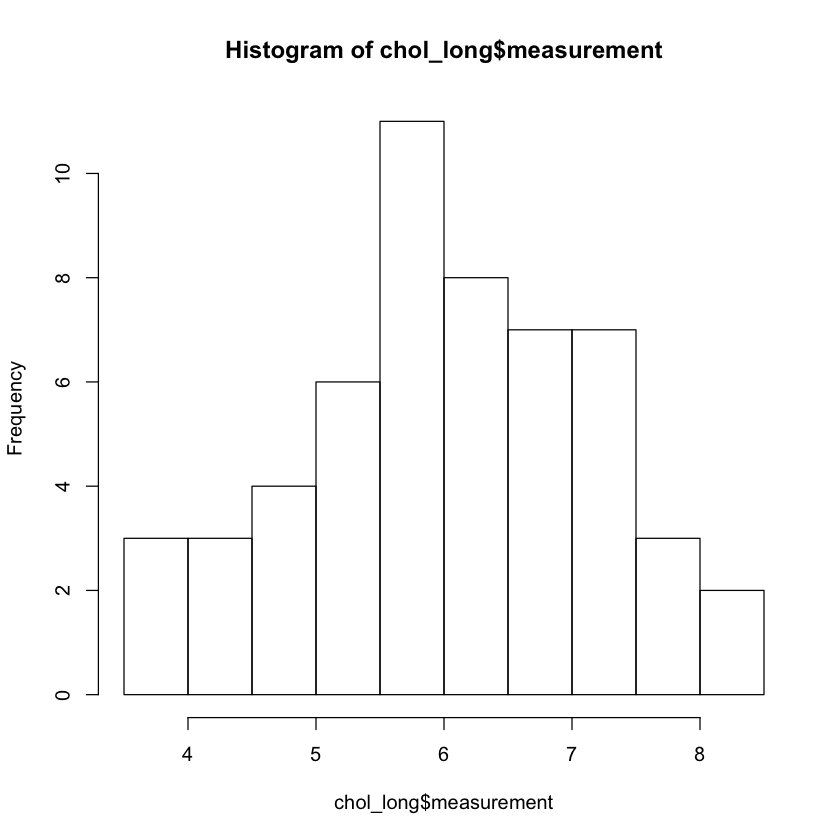

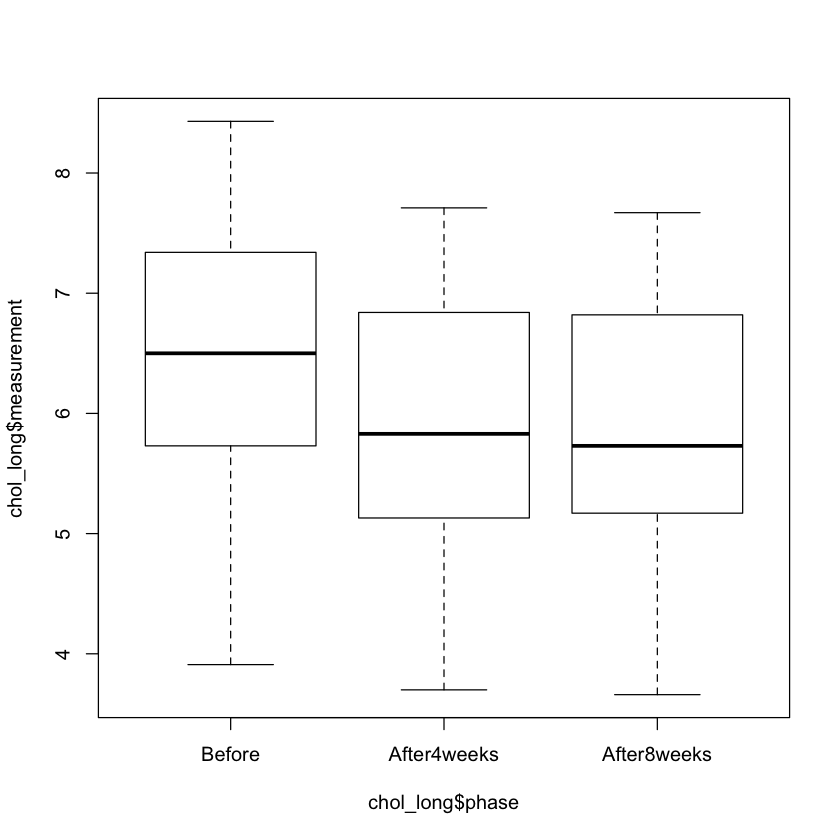

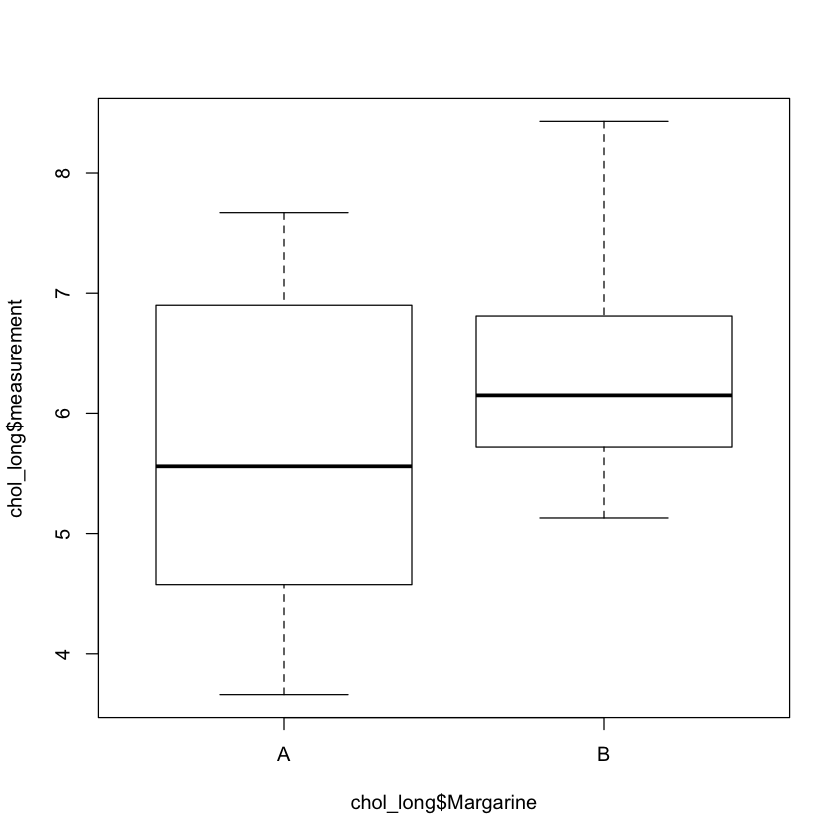

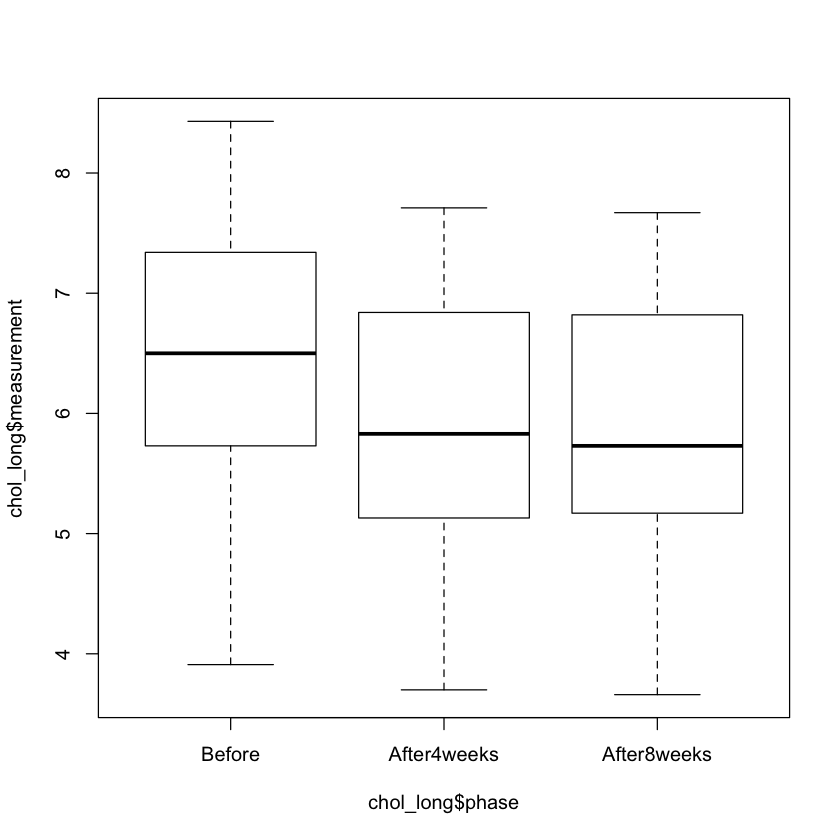

In [82]:
# The arguments to gather():
# - data: Data object
# - key: Name of new key column (made from names of data columns)
# - value: Name of new value column
# - ...: Names of source columns that contain values
# - factor_key: Treat the new key column as a factor (instead of character vector)
chol_long <- gather(chol_wide, phase, measurement, Before:After8weeks, factor_key=TRUE)
head(chol_long)
hist(chol_long$measurement)
plot(chol_long$measurement ~ chol_long$phase)


In [70]:
# perform anova with no corrections
chol_aov = aov(measurement ~ Margarine * phase + Error(ID), data = chol_long)   # uses Type II SS, can't change
summary(chol_aov)


Error: ID
          Df Sum Sq Mean Sq F value Pr(>F)
Margarine  1   5.46   5.459   1.446  0.247
Residuals 16  60.41   3.775               

Error: Within
                Df Sum Sq Mean Sq F value Pr(>F)    
phase            2  4.320  2.1598 259.490 <2e-16 ***
Margarine:phase  2  0.080  0.0398   4.777 0.0153 *  
Residuals       32  0.266  0.0083                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [91]:
# create contrasts of interest
decreasing = c(0.5, 0, -0.5)
increasing = c(-0.5, 0, 0.5)
parabolic = c(0.5, 0, 0.5)

contrasts(chol_long$phase) <- cbind(decreasing, increasing, parabolic)
contrasts(chol_long$Margarine) <- contr.sum(2)

# perform anova using GG and HF corrections
chol.ez <- ezANOVA(data = chol_long, dv = .(measurement), wid = .(ID),
                  between = .(Margarine), within = .(phase), type = 3, detailed = T, return_aov = TRUE)
print(chol.ez)

Warning message in aov(formula(aov_formula), data = data):
“Error() model is singular”

$ANOVA
           Effect DFn DFd          SSn        SSd          F            p p<.05
1     (Intercept)   1  16 1.950125e+03 60.4066593 516.532406 1.321812e-13     *
2       Margarine   1  16 5.459424e+00 60.4066593   1.446046 2.466580e-01      
3           phase   2  32 4.319544e+00  0.2663407 259.489821 1.675833e-20     *
4 Margarine:phase   2  32 7.951481e-02  0.2663407   4.776727 1.529979e-02     *
          ges
1 0.969826404
2 0.082552910
3 0.066462153
4 0.001308832

$`Mauchly's Test for Sphericity`
           Effect         W           p p<.05
3           phase 0.4589302 0.002904689     *
4 Margarine:phase 0.4589302 0.002904689     *

$`Sphericity Corrections`
           Effect       GGe        p[GG] p[GG]<.05       HFe        p[HF]
3           phase 0.6488999 4.701151e-14         * 0.6822991 1.141823e-14
4 Margarine:phase 0.6488999 3.214191e-02         * 0.6822991 2.994166e-02
  p[HF]<.05
3         *
4         *

$aov

Call:
aov(formula = formula(aov_formula), data = data)

Gra

In [92]:
## Now Using MANOVA
head(chol_wide)

ID,Before,After4weeks,After8weeks,Margarine
1,6.42,5.83,5.75,B
2,6.76,6.20,6.13,A
3,6.56,5.83,5.71,B
4,4.80,4.27,4.15,A
5,8.43,7.71,7.67,B
6,7.49,7.12,7.05,A


In [94]:
trial <- c(1, 2, 3)
trialfactor <- as.factor(trial)
trial_frame <- data.frame(trialfactor)
trial_bind <- cbind(chol_wide$Before,chol_wide$After4weeks,chol_wide$After8weeks)
model <- lm(trial_bind ~ chol_wide$Margarine)
analysis <- Anova(model, idata = trial_frame, idesign = ~trialfactor)
summary(analysis)


Type II Repeated Measures MANOVA Tests:

------------------------------------------
 
Term: (Intercept) 

 Response transformation matrix:
     (Intercept)
[1,]           1
[2,]           1
[3,]           1

Sum of squares and products for the hypothesis:
            (Intercept)
(Intercept)    5850.374

Multivariate Tests: (Intercept)
                 Df test stat approx F num Df den Df     Pr(>F)    
Pillai            1   0.96995 516.5324      1     16 1.3218e-13 ***
Wilks             1   0.03005 516.5324      1     16 1.3218e-13 ***
Hotelling-Lawley  1  32.28328 516.5324      1     16 1.3218e-13 ***
Roy               1  32.28328 516.5324      1     16 1.3218e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

------------------------------------------
 
Term: chol_wide$Margarine 

 Response transformation matrix:
     (Intercept)
[1,]           1
[2,]           1
[3,]           1

Sum of squares and products for the hypothesis:
            (Intercept)
(Interc